In [4]:
import os
from metrics import get_mtl_scores
# eval_log_path = os.path.join("run", "mtl-b256-base-20220515-163515", "logs", "eval_log.csv")
eval_log_path = os.path.join("run", "mtl-b256-base-20220530-214115", "eval_log.csv")

prom_scores, ss_scores, polya_scores = get_mtl_scores(eval_log_path, 9)

print(prom_scores)
print(ss_scores)
print(polya_scores)


prom_scores, ss_scores, polya_scores = get_mtl_scores(eval_log_path, 49)

print(prom_scores)
print(ss_scores)
print(polya_scores)


{'TP': 721, 'FP': 4466, 'TN': 2479, 'FN': 668}
{'TP': 2, 'FP': 31, 'TN': 6914, 'FN': 1387}
{'TP': 1118, 'FP': 4267, 'TN': 2678, 'FN': 271}
{'TP': 721, 'FP': 4466, 'TN': 2479, 'FN': 668}
{'TP': 2, 'FP': 31, 'TN': 6914, 'FN': 1387}
{'TP': 1118, 'FP': 4267, 'TN': 2678, 'FN': 271}


In [2]:
from metrics import accuracy, error_rate, precision, sensitivity, specificity, mcc
print(f"prom accuracy {accuracy(prom_scores['TP'], prom_scores['TN'], prom_scores['FP'], prom_scores['FN'])}")
print(f"ss accuracy {accuracy(ss_scores['TP'], ss_scores['TN'], ss_scores['FP'], ss_scores['FN'])}")
print(f"polya accuracy {accuracy(polya_scores['TP'], polya_scores['TN'], polya_scores['FP'], polya_scores['FN'])}")

print(f"prom error rate {100 - accuracy(prom_scores['TP'], prom_scores['TN'], prom_scores['FP'], prom_scores['FN'])}")
print(f"ss error rate {100 - accuracy(ss_scores['TP'], ss_scores['TN'], ss_scores['FP'], ss_scores['FN'])}")
print(f"polya error rate {100 - accuracy(polya_scores['TP'], polya_scores['TN'], polya_scores['FP'], polya_scores['FN'])}")

print(f"prom precision {precision(prom_scores['TP'], prom_scores['FP'])}")
print(f"ss precision {precision(ss_scores['TP'], ss_scores['FP'])}")
print(f"polya precision {precision(polya_scores['TP'], polya_scores['FP'])}")

print(f"prom recall {precision(prom_scores['TP'], prom_scores['FN'])}")
print(f"ss recall {precision(ss_scores['TP'], ss_scores['FN'])}")
print(f"polya recall {precision(polya_scores['TP'], polya_scores['FN'])}")

print(f"prom mcc {mcc(prom_scores['TP'], prom_scores['TN'], prom_scores['FP'], prom_scores['FN'])}")
print(f"ss mcc {mcc(ss_scores['TP'], ss_scores['TN'], ss_scores['FP'], ss_scores['FN'])}")
print(f"polya mcc {mcc(polya_scores['TP'], polya_scores['TN'], polya_scores['FP'], polya_scores['FN'])}")

prom accuracy 38.39692824574034
ss accuracy 82.9853611711063
polya accuracy 45.54835613150948
prom error rate 61.60307175425966
ss error rate 17.014638828893695
polya error rate 54.45164386849052
prom precision 13.900134952766532
ss precision 6.0606060606060606
polya precision 20.761374187558033
prom recall 51.90784737221023
ss recall 0.14398848092152627
polya recall 80.48956083513319
prom mcc -0.0953041152214481
ss mcc -0.017943704793300184
polya mcc 0.14847201475828925


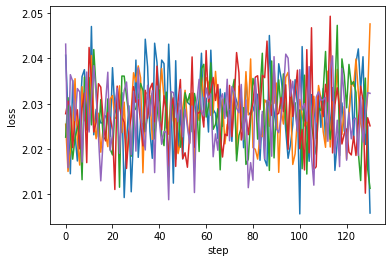

In [21]:
import pandas as pd
train_log_path = os.path.join("run", "mtl-b256-base-20220530-214115", "log.csv") 

train_df = pd.read_csv(train_log_path)
train_df_e49 = train_df[train_df['epoch'] == 49]
train_df_e9 = train_df[train_df['epoch'] == 9]

import matplotlib.pyplot as plt
import matplotlib as mpl

epochs = [10, 20, 30, 40, 50]
epochs = [e-1 for e in epochs]

fig, ax = plt.subplots()
ax.set_xlabel("step")
ax.set_ylabel("loss")

for e in epochs:
    df = train_df[train_df['epoch'] == e]
    steps = df['batch'].tolist()
    prom_losses = df['loss_prom'].tolist()
    ss_losses = df['loss_ss'].tolist()
    polya_losses = df['loss_polya'].tolist()
    losses = [a + b + c for a, b, c in zip(prom_losses, ss_losses, polya_losses)]

    ax.plot(steps, losses, label=f"epoch-{e + 1}")




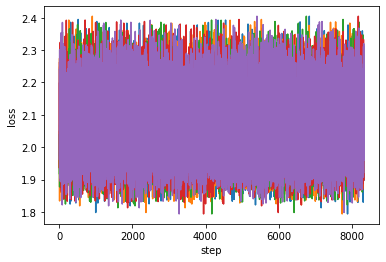

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

eval_log_path = os.path.join("run", "mtl-b256-base-20220530-214115", "eval_log.csv")
eval_df = pd.read_csv(eval_log_path)

epochs = [10, 20, 30, 40, 50]
epochs = [e-1 for e in epochs]

fig, ax = plt.subplots()
ax.set_xlabel("step")
ax.set_ylabel("loss")

for e in epochs:
    df = eval_df[eval_df['epoch'] == e]
    steps = df['step'].tolist()
    prom_losses = df['prom_loss'].tolist()
    ss_losses = df['ss_loss'].tolist()
    polya_losses = df['polya_loss'].tolist()
    losses = [(a + b + c) for a, b, c in zip(prom_losses, ss_losses, polya_losses)]

    ax.plot(steps, losses, label=f"epoch-{e + 1}")


In [61]:
eval_log_path = os.path.join("run", "mtl-b256-base-20220530-214115", "eval_log.csv")
eval_df = pd.read_csv(eval_log_path)

epochs = [10, 20, 30, 40, 50]
epochs = [e-1 for e in epochs]

#figs, axes = plt.subplots(3, 1)
#for ax in axes:
#    ax.set_xlabel("step")
#    ax.set_ylabel("loss")

epochs = eval_df['epoch'].unique()
prom_true = []
prom_false = []
ss_true = []
ss_false = []
polya_true = []
polya_false = []
prom_ndf = pd.DataFrame(columns=[f"epoch-{e}" for e in range(0,50)])
for e in epochs:
    prom_ndf[f'epoch-{e}'] = eval_df[eval_df['epoch'] == e]['prom_eval'].reset_index()['prom_eval']

prom_scores = []
for e in range(50):
    prom_scores.append(prom_ndf[f'epoch-{e}'].sum())

prom_scores

[3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200]

In [60]:
prom_ndf

,epoch-0,epoch-1,epoch-2,epoch-3,epoch-4,epoch-5,epoch-6,epoch-7,epoch-8,epoch-9,...,epoch-40,epoch-41,epoch-42,epoch-43,epoch-44,epoch-45,epoch-46,epoch-47,epoch-48,epoch-49
0,1,0,0,1,1,1,1,1,1,0,...,1,0,0,0,1,1,1,1,1,0
1,0,0,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,1,1,0,0,0
3,0,1,1,0,1,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,1
4,0,1,0,1,0,0,0,0,1,1,...,1,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,1,1,0,1,0,1,0,0,0,1,...,0,0,1,1,0,1,0,1,0,0
8330,0,1,0,0,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,0,1
8331,1,1,1,1,0,0,0,0,0,1,...,0,0,0,1,1,1,1,0,1,0
8332,0,0,0,0,1,0,1,1,0,0,...,0,1,1,1,1,1,0,0,0,0
